In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
#SalePrice

train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

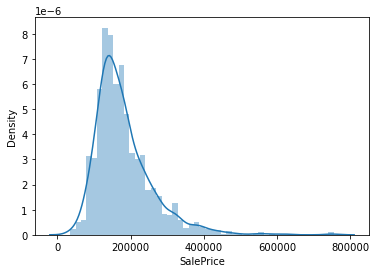

In [9]:
sns.distplot(train_df['SalePrice'])

In [10]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [11]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

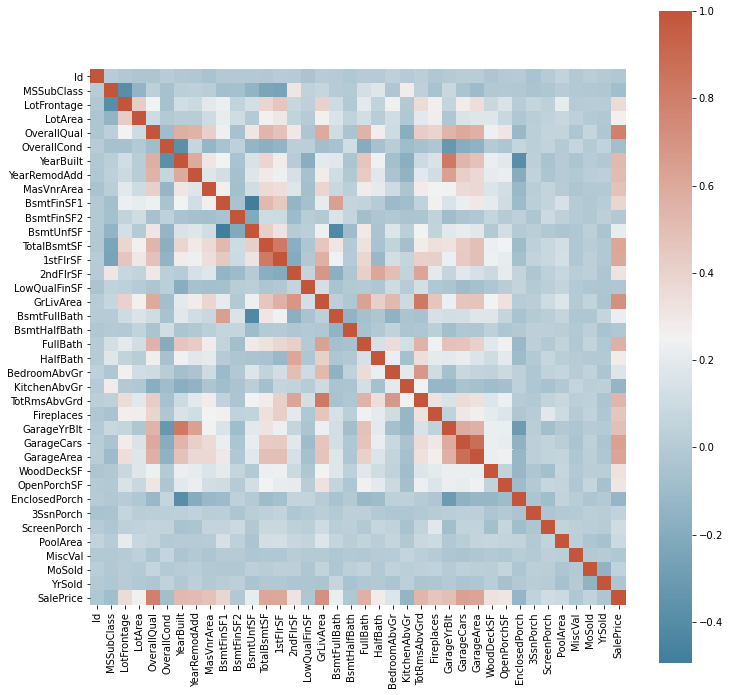

In [12]:
#Correlation Heatmap

corr_df=train_df.corr() 
cmap = sns.diverging_palette(230, 20, as_cmap=True) #custom diverging colormap
f,ax =plt.subplots(figsize=(12,12)) #figSize
sns.heatmap(corr_df,cmap=cmap,cbar=True, xticklabels=corr_df.columns,yticklabels=corr_df.columns,square=True,vmax=1)

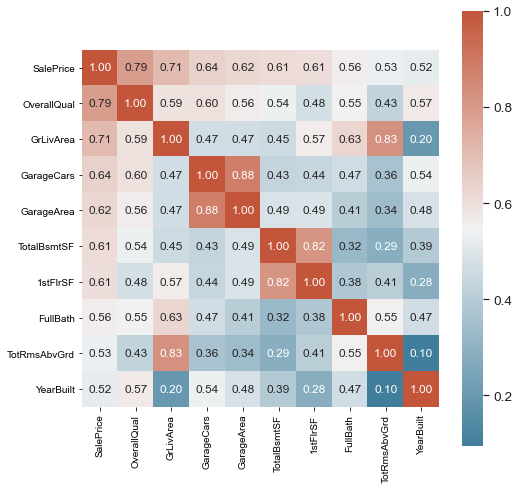

In [13]:
#Zoom to find more strong independent features correlates with saleprice

k = 10 #no. of variables for heatmap
cols = corr_df.nlargest(k, 'SalePrice')['SalePrice'].index
corrm = np.corrcoef(train_df[cols].values.T)
f1,ax1 =plt.subplots(figsize=(8,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(corrm, cmap=cmap,cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

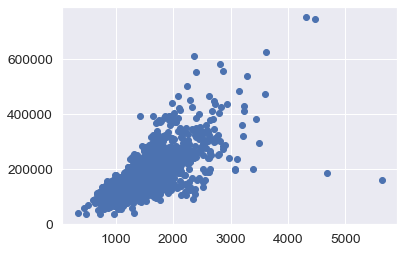

In [14]:
#Relationship with Numerical Variables

#GrLivArea

plt.scatter(x=train_df['GrLivArea'], y=train_df['SalePrice']);

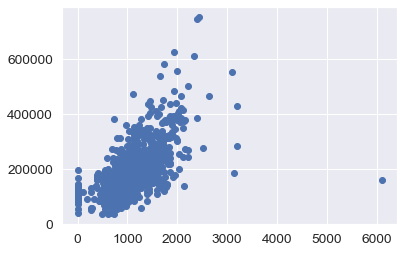

In [15]:
#TotalBsmtSF

plt.scatter(x=train_df['TotalBsmtSF'], y=train_df['SalePrice']);

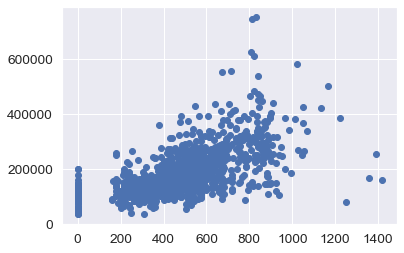

In [16]:
#GarageArea

plt.scatter(x=train_df['GarageArea'], y=train_df['SalePrice']);

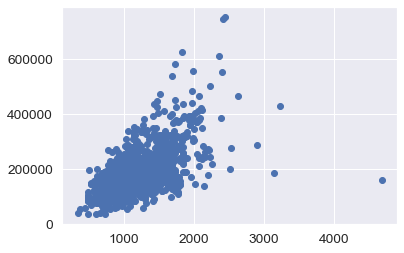

In [17]:
#1stFlrSF

plt.scatter(x=train_df['1stFlrSF'], y=train_df['SalePrice']);

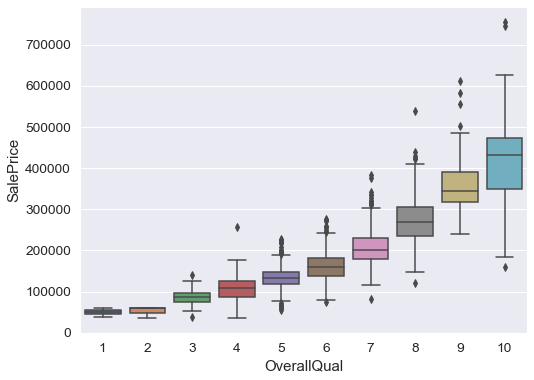

In [18]:
#Relationship with Categorical Variables

#OverallQual

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'], data=train_df)

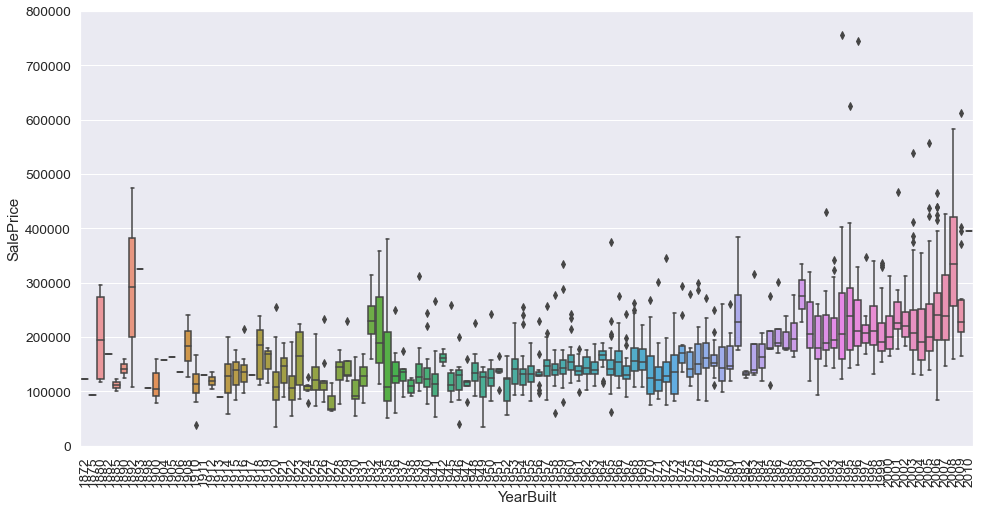

In [19]:
#YearBuilt

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], data=train_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

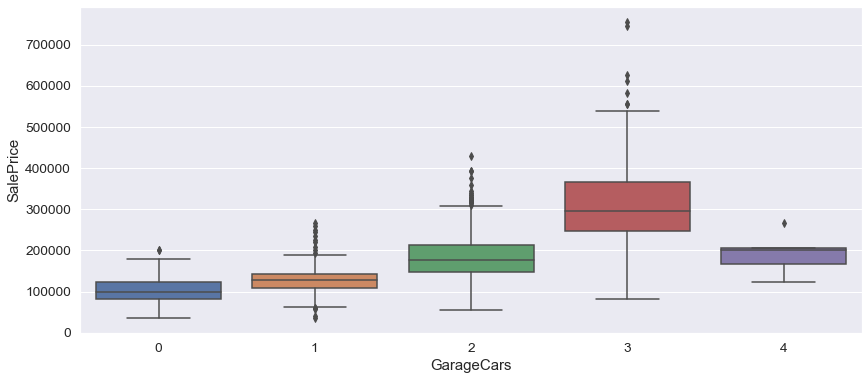

In [20]:
#GarageCars

f, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=train_df,x='GarageCars',y='SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

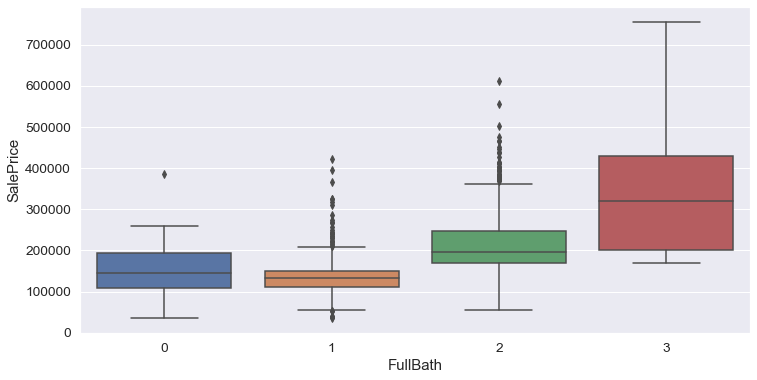

In [21]:
#Fullbath

f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=train_df,x='FullBath',y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

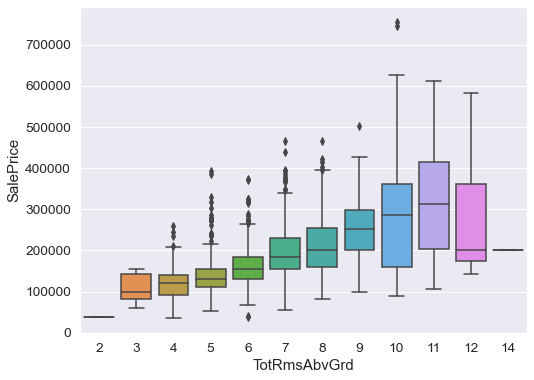

In [22]:
#TotRmsAbvGrd

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=train_df,x='TotRmsAbvGrd',y='SalePrice')

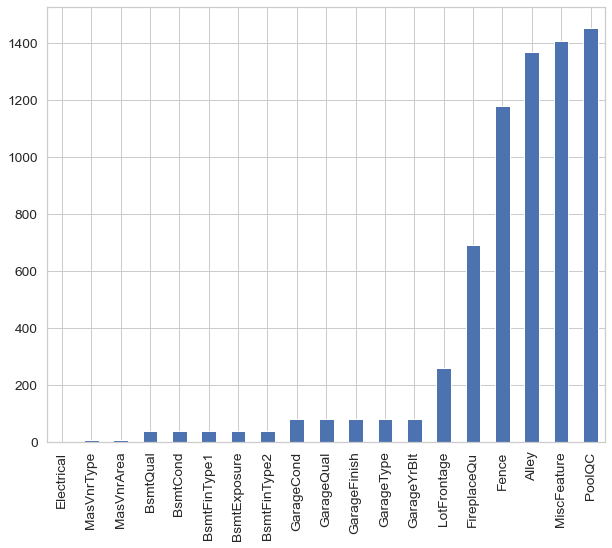

In [23]:
#Missing Values

sns.set_style("whitegrid")
plt.figure(num=None, figsize=(10, 8))
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [24]:
#deleting the columns with high missing values

del train_df['PoolQC'], train_df['MiscFeature'], train_df['Alley'], train_df['Fence']
del test_df['PoolQC'], test_df['MiscFeature'], test_df['Alley'], test_df['Fence']

In [25]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent=(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False)
miss_data=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_data.head(25)

,Total_Null,Percent
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247


In [26]:
train_df.shape

(1460, 77)

In [27]:
test_df.shape

(1459, 76)

In [28]:
train_df1=train_df.drop((miss_data[miss_data['Percent']>2]).index,1)

In [29]:
train_df1.shape

(1460, 65)

In [30]:
train_df1.drop('MasVnrArea',axis=1,inplace=True)
train_df1.drop('MasVnrType',axis=1,inplace=True)

In [31]:
#Remove one row

train_df1=train_df1.drop(train_df1[train_df1['Electrical'].isnull()].index)

In [32]:
train_df1.shape

(1459, 63)

In [33]:
if train_df1.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


In [34]:
#Seperating Numerical and Categorical features

num_df= [col for col in train_df1.columns 
          if train_df1[col].dtype in ['int64','float64']]
cat_df= [col for col in train_df1.columns 
          if train_df1[col].dtype in ['object']]

In [35]:
train_df1.drop(cat_df,axis=1,inplace=True)

In [36]:
train_df1.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [37]:
train_df1.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
col = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
       'GarageArea','BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
train_df1.drop(col,axis=1, inplace=True)

In [39]:
train_df1.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'],
      dtype='object')

In [40]:
train_df1.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
0,7,2003,856,856,1710,2,8,2,208500
1,6,1976,1262,1262,1262,2,6,2,181500
2,7,2001,920,920,1786,2,6,2,223500
3,7,1915,756,961,1717,1,7,3,140000
4,8,2000,1145,1145,2198,2,9,3,250000


In [41]:
#Test Data

total = test_df.isnull().sum().sort_values(ascending=False)
percent=(test_df.isnull().sum()/len(test_df)*100).sort_values(ascending=False)
miss_test_df=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_test_df.head(40)

,Total_Null,Percent
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageType,76,5.209047
BsmtCond,45,3.084304
BsmtQual,44,3.015764
BsmtExposure,44,3.015764


In [42]:
test_df1=test_df.drop((miss_test_df[miss_test_df['Total_Null']>1]).index,1)

In [43]:
test_df1.shape

(1459, 57)

In [44]:
test_df1.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [45]:
test_df1.dtypes[test_df1.dtypes == np.object]

Street           object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [46]:
test_df1.dtypes[test_df1.dtypes == np.float64]

BsmtFinSF1     float64
BsmtFinSF2     float64
BsmtUnfSF      float64
TotalBsmtSF    float64
GarageCars     float64
GarageArea     float64
dtype: object

In [47]:
testcol =['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour', 
          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
          'BldgType', 'HouseStyle', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 
          'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 
          'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 
          'HeatingQC', 'CentralAir','Electrical', '2ndFlrSF', 'LowQualFinSF', 
          'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 
          'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
          'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType','SaleCondition']
test_df1.drop(testcol, axis=1,inplace=True)

In [48]:
test_df1['GarageCars'].fillna(value = test_df1['GarageCars'].median(),inplace = True)
test_df1['TotalBsmtSF'].fillna(value = test_df1['TotalBsmtSF'].median(),inplace = True)

In [49]:
test_df1.drop('GarageArea',axis=1,inplace=True)

In [50]:
test_df1.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
0,5,1961,882.0,896,896,1,5,1.0
1,6,1958,1329.0,1329,1329,1,6,1.0
2,5,1997,928.0,928,1629,2,6,2.0
3,6,1998,926.0,926,1604,2,7,2.0
4,8,1992,1280.0,1280,1280,2,5,2.0


In [51]:
test_df1.shape

(1459, 8)

In [52]:
# Check any missing Values
if test_df1.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


In [53]:
#Outliers

train_df1.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'],
      dtype='object')

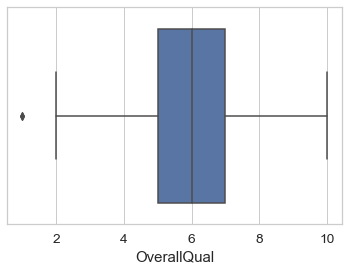

In [54]:
#OverallQual

sns.boxplot(train_df1['OverallQual']);

In [55]:
train_df1.drop(train_df1[train_df1['OverallQual'] < 2].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='TotalBsmtSF'>

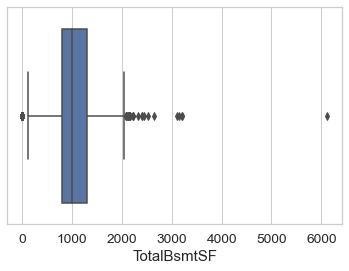

In [56]:
#TotalBsmtSF

sns.boxplot(train_df1['TotalBsmtSF'])

In [57]:
train_df1.drop(train_df1[train_df1['TotalBsmtSF'] > 3500].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='1stFlrSF'>

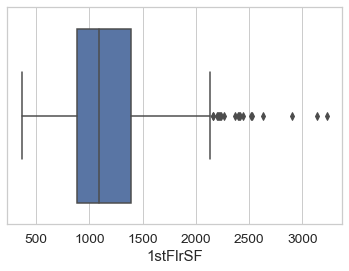

In [58]:
#1stFlrSF

sns.boxplot(train_df1['1stFlrSF'])

In [59]:
train_df1.drop(train_df1[train_df1['1stFlrSF'] > 2500].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='GrLivArea'>

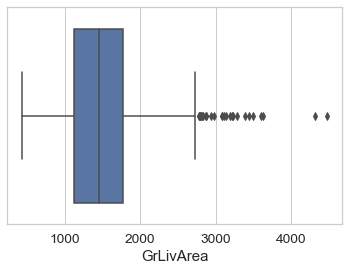

In [60]:
#GrLivArea

sns.boxplot(train_df1['GrLivArea'])

In [61]:
train_df1.drop(train_df1[train_df1['GrLivArea'] > 4000].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='FullBath'>

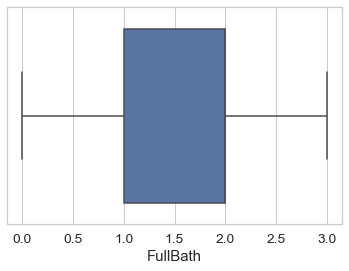

In [62]:
#FullBath

sns.boxplot(train_df1['FullBath'])

<AxesSubplot:xlabel='TotRmsAbvGrd'>

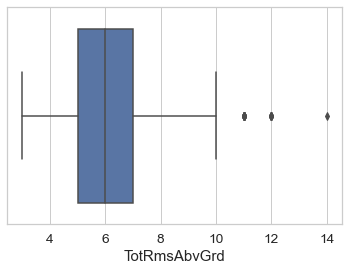

In [63]:
#TotRmsAbvGrd

sns.boxplot(train_df1['TotRmsAbvGrd'])

In [64]:
train_df1.drop(train_df1[train_df1['TotRmsAbvGrd'] > 11].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='GarageCars'>

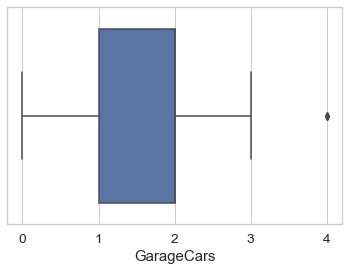

In [65]:
#GarageCars

sns.boxplot(train_df1['GarageCars'])

In [66]:
train_df1.drop(train_df1[train_df1['GarageCars'] > 3.5].index, axis = 0, inplace = True)

In [67]:
#YearBuilt
#Convert YearBuilt into Years

train_df1['Years']=2021-train_df1['YearBuilt']
train_df1.drop('YearBuilt',axis=1,inplace=True)

In [68]:
train_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,Years
0,7,856,856,1710,2,8,2,208500,18
1,6,1262,1262,1262,2,6,2,181500,45
2,7,920,920,1786,2,6,2,223500,20
3,7,756,961,1717,1,7,3,140000,106
4,8,1145,1145,2198,2,9,3,250000,21


<AxesSubplot:xlabel='Years'>

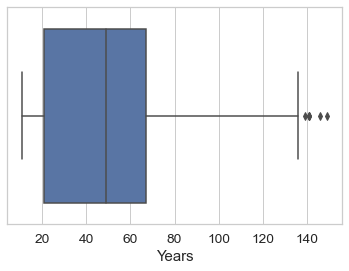

In [69]:
sns.boxplot(train_df1['Years'])

In [70]:
train_df1.drop(train_df1[train_df1['Years'] > 145].index, axis = 0, inplace = True)

In [71]:
train_df1.shape

(1431, 9)

In [72]:
train_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,Years
0,7,856,856,1710,2,8,2,208500,18
1,6,1262,1262,1262,2,6,2,181500,45
2,7,920,920,1786,2,6,2,223500,20
3,7,756,961,1717,1,7,3,140000,106
4,8,1145,1145,2198,2,9,3,250000,21


In [73]:
train_df1=train_df1.reindex(columns=['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'Years','SalePrice'])

In [74]:
train_df1.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years,SalePrice
0,7,856,856,1710,2,8,2,18,208500
1,6,1262,1262,1262,2,6,2,45,181500
2,7,920,920,1786,2,6,2,20,223500


In [75]:
#We convert the YearBuilt for test data

test_df1['Years']=2021-test_df1['YearBuilt']
test_df1.drop('YearBuilt',axis=1,inplace=True)
test_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,5,882.0,896,896,1,5,1.0,60
1,6,1329.0,1329,1329,1,6,1.0,63
2,5,928.0,928,1629,2,6,2.0,24
3,6,926.0,926,1604,2,7,2.0,23
4,8,1280.0,1280,1280,2,5,2.0,29


In [76]:
test_df1.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,5,882.0,896,896,1,5,1.0,60
1,6,1329.0,1329,1329,1,6,1.0,63
2,5,928.0,928,1629,2,6,2.0,24


In [77]:
test_df1.shape

(1459, 8)

In [78]:
#Split the data

X_train = train_df1.drop('SalePrice', axis=1)
y_train = train_df1['SalePrice']

In [79]:
X_train.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,7,856,856,1710,2,8,2,18
1,6,1262,1262,1262,2,6,2,45
2,7,920,920,1786,2,6,2,20


In [80]:
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [81]:
X_test = test_df1

In [82]:
#Import StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
X_train[:] = scaler.fit_transform(X_train[:])
X_test[:] = scaler.fit_transform(X_test[:])

In [84]:
X_train.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,0.677064,-0.472565,-0.824644,0.458352,0.824177,1.010436,0.330859,-1.055503
1,-0.064803,0.536137,0.313033,-0.484504,0.824177,-0.298101,0.330859,-0.151859
2,0.677064,-0.313558,-0.645306,0.618301,0.824177,-0.298101,0.330859,-0.988567


In [85]:
X_test.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,-0.751101,-0.370716,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,0.340945
1,-0.054877,0.639230,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,0.439695
2,-0.751101,-0.266784,-0.574165,0.294508,0.773083,-0.255371,0.301406,-0.844059


In [86]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [87]:
#RFE-Recursive Feature Elimination

rfe = RFE(reg1, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'Years'],
      dtype='object')

In [89]:
reg1.fit(X_train[cols],y_train)

LinearRegression()

In [90]:
reg1.score(X_train[cols], y_train)

0.819397060103233

In [91]:
y_pred = reg1.predict(X_test[cols])

In [92]:
y_pred

array([111281.18005994, 171948.02707679, 170730.20443579, ...,
       153158.58840284, 118705.76860596, 236882.22107174])

In [93]:
out = pd.DataFrame({'Id': test_df.Id,'SalePrice':y_pred})
out

,Id,SalePrice
0,1461,111281.180060
1,1462,171948.027077
2,1463,170730.204436
3,1464,186134.128463
4,1465,216077.734043
...,...,...
1454,2915,84892.643463
1455,2916,93771.953031
1456,2917,153158.588403
1457,2918,118705.768606


In [101]:
#RidgeCV

from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)


rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)


train_score=reg1.score(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)

Ridge_train_score100 = rr100.score(X_train,y_train)


print('train_score: ', train_score)
print('\nRidge_train_score: ', Ridge_train_score)
print('\nRidge_train_score100: ', Ridge_train_score100)



train_score:  0.819397060103233

Ridge_train_score:  0.8193970600639663

Ridge_train_score100:  0.817227045583128


In [102]:
#LassoCV - 

from sklearn.linear_model import LassoCV
reg2 = LassoCV()
reg2.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg2.alpha_)
print("Best score using built-in LassoCV: %f" %reg2.score(X_train,y_train))
coef = pd.Series(reg2.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 368.207558
Best score using built-in LassoCV: 0.819056


In [103]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

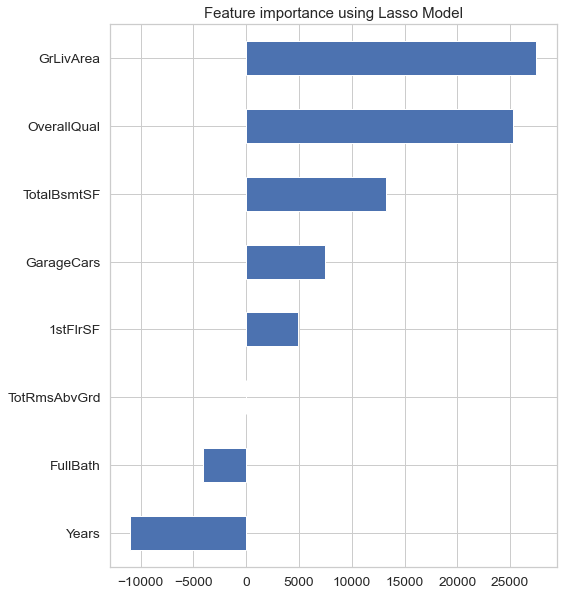

In [104]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")